# <u>Data Science Essentials</u>

## <u>Topic</u>: Correlation Matrix

## <u>Category</u>: Data Visualization

### <u>Created By</u>: Mohammed Misbahullah Sheriff
- [LinkedIn](https://www.linkedin.com/in/mohammed-misbahullah-sheriff/)
- [GitHub](https://github.com/MisbahullahSheriff)

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import os

## Getting the Data

In [2]:
file_dir = "C:\Python Programs\datasets"
file_name = "car-details.csv"
file_path = os.path.join(file_dir, file_name)

df = pd.read_csv(file_path)
print("Data Shape:", df.shape)
df.head()

Data Shape: (6926, 16)


,name,company,model,edition,year,owner,fuel,seller_type,transmission,km_driven,mileage_mpg,engine_cc,max_power_bhp,torque_nm,seats,selling_price
0,Maruti Swift Dzire VDI,Maruti,Swift,Dzire VDI,2014,First,Diesel,Individual,Manual,145500,55.00,1248.0,74.00,190.000000,5.0,450000
1,Skoda Rapid 1.5 TDI Ambition,Skoda,Rapid,1.5 TDI Ambition,2014,Second,Diesel,Individual,Manual,120000,49.70,1498.0,103.52,250.000000,5.0,370000
2,Honda City 2017-2020 EXi,Honda,City,2017-2020 EXi,2006,Third,Petrol,Individual,Manual,140000,41.60,1497.0,78.00,124.544455,5.0,158000
3,Hyundai i20 Sportz Diesel,Hyundai,i20,Sportz Diesel,2010,First,Diesel,Individual,Manual,127000,54.06,1396.0,90.00,219.668960,5.0,225000
4,Maruti Swift VXI BSIII,Maruti,Swift,VXI BSIII,2007,First,Petrol,Individual,Manual,120000,37.84,1298.0,88.20,112.776475,5.0,130000


## Demo

In [3]:
corr_mat = df.corr()
corr_mat

,year,km_driven,mileage_mpg,engine_cc,max_power_bhp,torque_nm,seats,selling_price
year,1.000000,-0.377003,0.324193,-0.019074,0.159889,0.053617,0.023632,0.433076
km_driven,-0.377003,1.000000,-0.174163,0.253339,0.041770,0.128881,0.207957,-0.165620
mileage_mpg,0.324193,-0.174163,1.000000,-0.466693,-0.282228,-0.160201,-0.380941,-0.067668
engine_cc,-0.019074,0.253339,-0.466693,1.000000,0.683506,0.607003,0.657798,0.442857
max_power_bhp,0.159889,0.041770,-0.282228,0.683506,1.000000,0.669820,0.259028,0.692323
torque_nm,0.053617,0.128881,-0.160201,0.607003,0.669820,1.000000,0.325996,0.473283
seats,0.023632,0.207957,-0.380941,0.657798,0.259028,0.325996,1.000000,0.158111
selling_price,0.433076,-0.165620,-0.067668,0.442857,0.692323,0.473283,0.158111,1.000000


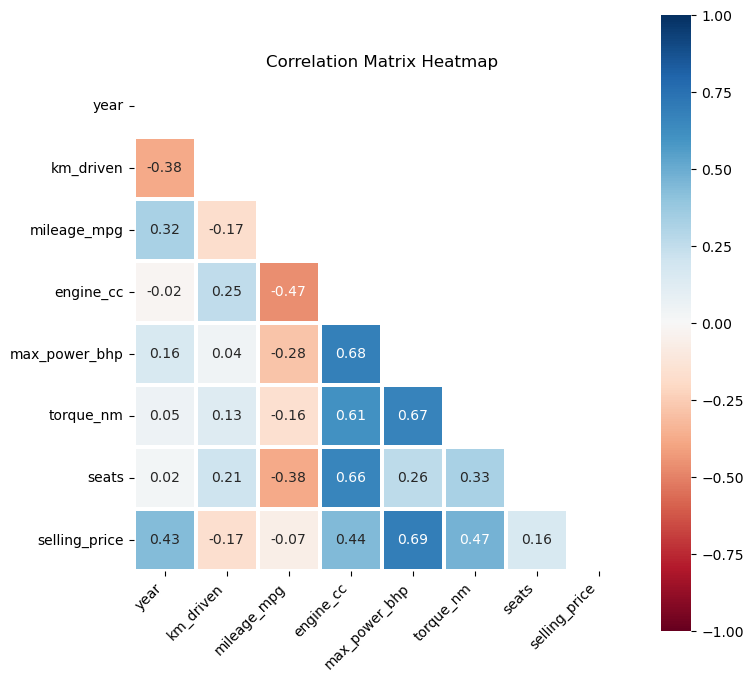

In [4]:
fig, ax = plt.subplots(figsize=(8, 8))

mask = np.zeros_like(corr_mat, dtype=bool)
mask[np.triu_indices_from(mask)] = True

hm = sns.heatmap(
    data=corr_mat,
    vmin=-1,
    vmax=1,
    cmap="RdBu",
    center=0,
    annot=True,
    fmt=".2f",
    linewidths=1.5,
    linecolor="white",
    cbar=True,
    square=True,
    mask=mask,
    ax=ax
)

hm.set_xticklabels(hm.get_xticklabels(),
                   rotation=45,
                   ha="right")

hm.set_title("Correlation Matrix Heatmap")

plt.show()

### Observations:

- The target variable `selling_price` is highly correlated to:
  - year
  - engine_cc
  - max_power_bhp
  - torque_nm
- There's quite a lot of multi-collinearity in the dataset
- The feature `engine_cc` is highly correlated to:
  - seats
  - torque_nm
  - max_power_bhp
- The feature `mileage_mpg` has appreciable negative correlation with:
  - seats
  - engine_cc
- Thus, visualization correlation matrix as a heatmap makes it very convenient to analyze and detect correlations among the variables in the dataset
- By default, `pandas` calculates the `pearson correlation coefficient`
  - It can be made to calculate other correlation coefficients by setting the parameter `method` of the `corr` method
- Since the correlation matrix is symmetric in nature, the `mask` parameter of the `heatmap` function is used to only display the lower triangular portion (in this example)